# Guided Project: Star Wars Survey

In this project, we will aim to answer the question:

**Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**
## Data

We will be using the Star Wars Survey data collected by FiveThirtyEight from 835 Star Wars fans. The data is available on their [[github page]](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In [495]:
import pandas as pd
import matplotlib.pyplot as plt

In [496]:
# Read in the dataset
star_wars = pd.read_csv("star_wars.csv")

In [509]:
# View the first 10 rows
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


In [498]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [499]:
# Convert the provided columns to boolean values
def yes_no_columns_to_bool(df, col_start: int, col_end: int) -> None:
    """
    Convert specified columns in the dataframe to boolean values.

    Args:
        df (pandas.DataFrame): The dataframe to use.
        col_start (int): The starting index of the columns to convert.
        col_end (int): The ending index of the columns to convert.

    Returns:
        None
    """
    # Iterate over the specified columns
    for col in df.iloc[:, col_start:col_end]:
        # Map the values "Yes" to True and "No" to False
        df[col] = df[col].map(
            arg=lambda x: {"Yes": True, "No": False}[x], na_action="ignore"
        )

    return None


# Call the function with the specified column indices
yes_no_columns_to_bool(df=star_wars, col_start=1, col_end=3)

In [500]:
# Rename and convert the provided columns to boolean values
def clean_and_convert_movie_columns(df, col_start: int, col_end: int) -> None:
    """
    Clean and convert movie columns in the star_wars DataFrame to boolean values.

    Args:
        df (pandas.DataFrame): The dataframe to use.
        col_start (int): The starting index of the columns to clean and convert.
        col_end (int): The ending index of the columns to clean and convert.

    Returns:
        None
    """
    # Iterate on the specifed columns using the 'enumerate' function
    # Enumerate returns a index, value pair to allow for efficient iteration
    # Rename the columns using the 'enumerate' function
    [
        df.rename(columns={col: col.replace(col, f"seen_{idx+1}")}, inplace=True)
        for idx, col in enumerate(df.columns[col_start:col_end])
    ]

    # Get the most common movie mapping for each column as a list
    movie_mapping = list(df.iloc[:, col_start:col_end].value_counts().index[0])

    # Convert the movie columns to boolean values
    # Returns "True" if the movie is in the mapping, "False" otherwise
    df.iloc[:, col_start:col_end] = df.iloc[:, col_start:col_end].isin(movie_mapping)

    return None


# Call the function with the specified column indices
clean_and_convert_movie_columns(df=star_wars, col_start=3, col_end=9)

In [501]:
# Convert the provided columns to float values
def clean_and_convert_ranking_columns(df, col_start: int, col_end: int) -> None:
    """
    Clean and convert ranking columns in the star_wars DataFrame to float values.

    Args:
        df (pandas.DataFrame): The dataframe to use.
        col_start (int): The starting index of the columns to clean and convert.
        col_end (int): The ending index of the columns to clean and convert.

    Returns:
        None
    """
    # Rename the columns using the 'enumerate' function
    # Enumerate returns a index, value pair to allow for efficient iteration
    [
        df.rename(columns={col: col.replace(col, f"ranking_{idx+1}")}, inplace=True)
        for idx, col in enumerate(df.columns[col_start:col_end])
    ]

    return None


# Call the function with the specified column indices
clean_and_convert_ranking_columns(df=star_wars, col_start=9, col_end=15)

In [502]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                          --------------  -----  
 0   RespondentID                                                                                                    1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                    1186 non-null   bool   
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                           836 non-null    object 
 3   seen_1                                                                                                          1186 non-null   object 
 4   seen_2                                    

In [503]:
# Calculate the mean of the provided columns
def ranking_columns_mean(df, col_start: int, col_end: int) -> pd.Series:
    """
    Calculate the mean of the columns in the given range.

    Args:
        df (pandas.DataFrame): The dataframe to use.
        col_start (int): The start index of the columns range.
        col_end (int): The end index of the columns range.

    Returns:
        pandas.Series: The mean of the columns.
    """
    return df.iloc[:, col_start:col_end].mean()


# Calculate the sum of the provided columns
def seen_columns_sum(df, col_start: int, col_end: int) -> pd.Series:
    """
    Calculate the sum of the columns in the given range.

    Args:
        df (pandas.DataFrame): The dataframe to use.
        col_start (int): The start index of the columns range.
        col_end (int): The end index of the columns range.

    Returns:
        pandas.Series: The sum of the columns.
    """
    return df.iloc[:, col_start:col_end].sum()

So far, we've cleaned up the data and renamed and converted multiple columns. Now, we can create some visualizations to get a better sense of the data.

## Rankings

'Average Rankings per movie'

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

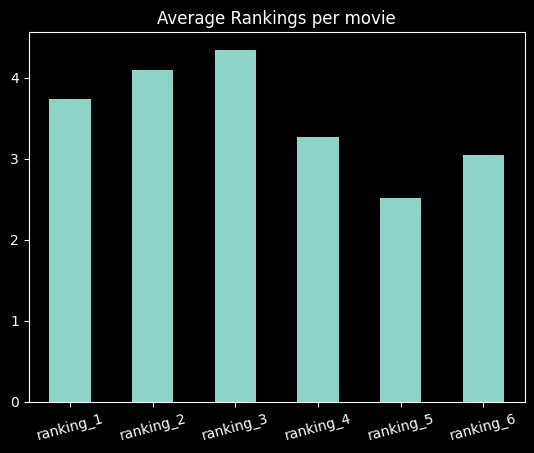

In [504]:
display(
    "Average Rankings per movie",
    ranking_columns_mean(df=star_wars, col_start=9, col_end=15),
)
ranking_columns_mean(df=star_wars, col_start=9, col_end=15).plot(
    kind="bar", rot=15, title="Average Rankings per movie"
)
plt.show()

As we suspected, the 'original' movies are rated more highly than the newer ones. However, we can also see that the average ranking for the newer movies is higher than the average ranking for the 'original' movies.

## View Counts

'Total Views per movie'

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: object

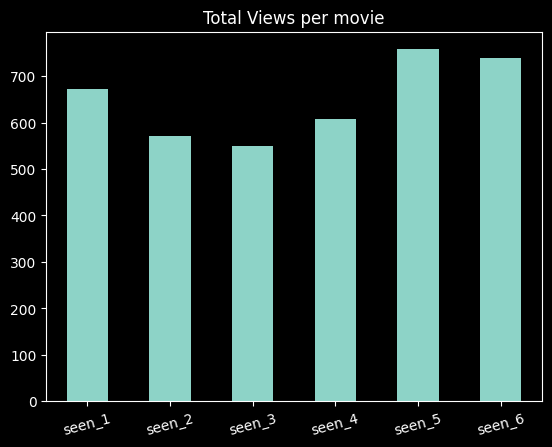

In [505]:
display("Total Views per movie", seen_columns_sum(df=star_wars, col_start=3, col_end=9))
seen_columns_sum(df=star_wars, col_start=3, col_end=9).plot(
    kind="bar", rot=15, title="Total Views per movie"
)
plt.show()

It appears that the majority of respondents viewed the original movies more than the newer ones. This reinforces the findings that the 'original' movies are rated more highly than the newer ones.

## Gender Differences

In [506]:
males = star_wars.query(expr="Gender == 'Male'")
females = star_wars.query(expr="Gender == 'Female'")

'Average Male Rakings per movie'

ranking_1    4.037825
ranking_2    4.224586
ranking_3    4.274882
ranking_4    2.997636
ranking_5    2.458629
ranking_6    3.002364
dtype: float64

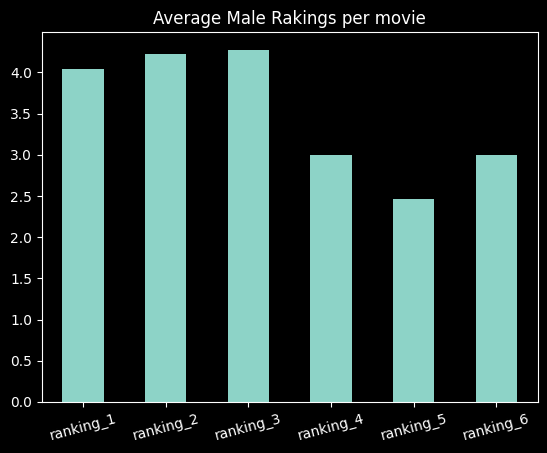

'Average Female Rakings per movie'

ranking_1    3.429293
ranking_2    3.954660
ranking_3    4.418136
ranking_4    3.544081
ranking_5    2.569270
ranking_6    3.078086
dtype: float64

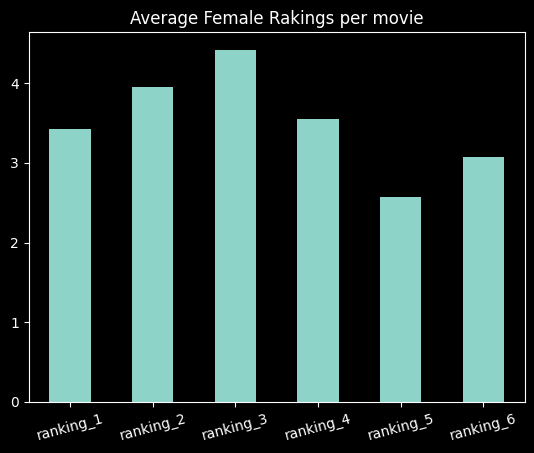

In [507]:
display(
    "Average Male Rakings per movie",
    ranking_columns_mean(df=males, col_start=9, col_end=15),
)
ranking_columns_mean(df=males, col_start=9, col_end=15).plot(
    kind="bar", rot=15, title="Average Male Rakings per movie"
)
plt.show()

display(
    "Average Female Rakings per movie",
    ranking_columns_mean(df=females, col_start=9, col_end=15),
)
ranking_columns_mean(df=females, col_start=9, col_end=15).plot(
    kind="bar", rot=15, title="Average Female Rakings per movie"
)
plt.show()

'Total Male Views per movie'

seen_1    361
seen_2    323
seen_3    317
seen_4    342
seen_5    392
seen_6    387
dtype: object

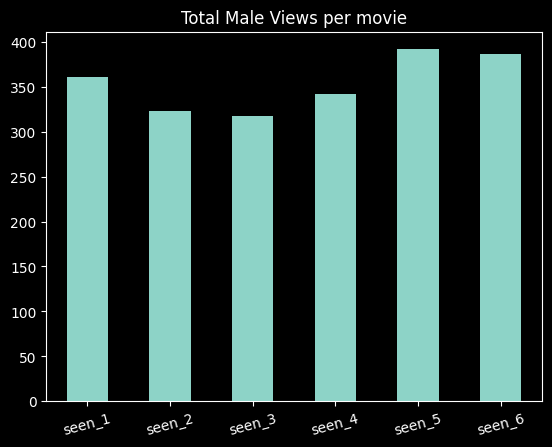

'Total Female Views per movie'

seen_1    298
seen_2    237
seen_3    222
seen_4    255
seen_5    353
seen_6    338
dtype: object

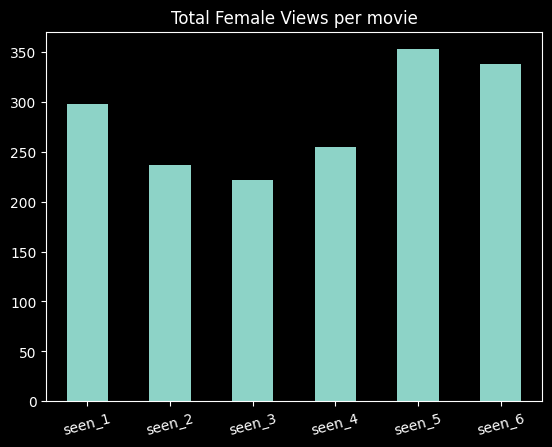

In [508]:
display(
    "Total Male Views per movie", seen_columns_sum(df=males, col_start=3, col_end=9)
)
seen_columns_sum(df=males, col_start=3, col_end=9).plot(
    kind="bar", rot=15, title="Total Male Views per movie"
)
plt.show()

display(
    "Total Female Views per movie", seen_columns_sum(df=females, col_start=3, col_end=9)
)
seen_columns_sum(df=females, col_start=3, col_end=9).plot(
    kind="bar", rot=15, title="Total Female Views per movie"
)
plt.show()

As shown above, males tend to rate the 'original' movies lower despite viewing them more than females.